#JPX STOCK Prediction Explaratory Data Analysis


How to get setup up and running: 
1. run 'jupyter-lab' in the command line
2. open another shell and cd to working directory
3. git status to check if there are pending updates
4. git add . (learn to use other 'adds' and 'gitignore')
5. git commit -m "type a message here"
6. git push

##Importing libraries and packages

In [38]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

##Loading the data

The data for this competition is too big to be updated on Github.
We will store the data in a separate directory in the parent folder 

I ended up copying the information into this folder then using .gitignore to avoid publishing data into github

In [41]:
#Import train & test data & more
df_financials = pd.read_csv('data/train_files/financials.csv')
df_options = pd.read_csv('data/train_files/options.csv')
df_secondary_stock_prices = pd.read_csv('data/train_files/secondary_stock_prices.csv')
df_stock_prices = pd.read_csv('data/train_files/stock_prices.csv')
df_trades = pd.read_csv('data/train_files/trades.csv')

In [45]:
df_stock_prices.head(15)

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026
5,20170104_1379,2017-01-04,1379,2105.0,2147.0,2101.0,2143.0,77300,1.0,NaN,False,0.005169
6,20170104_1381,2017-01-04,1381,1950.0,1960.0,1949.0,1960.0,1300,1.0,NaN,False,-0.009326
7,20170104_1407,2017-01-04,1407,857.0,877.0,851.0,866.0,147000,1.0,NaN,False,-0.003437
8,20170104_1414,2017-01-04,1414,4940.0,5060.0,4935.0,5050.0,119600,1.0,NaN,False,0.000000
9,20170104_1417,2017-01-04,1417,1051.0,1063.0,1048.0,1053.0,347500,1.0,NaN,False,-0.007463


<AxesSubplot:ylabel='Frequency'>

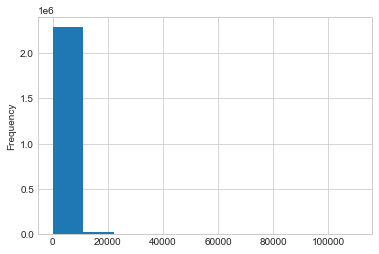

In [46]:
df_stock_prices.High.plot.hist()
